In [1]:
import pandas as pd
with open('./coronavirusdataset/PatientInfo.csv', 'rb') as infile:
    patient_info = pd.read_csv(infile)
    
with open('./coronavirusdataset/PatientRoute.csv', 'rb') as infile:
    patient_route = pd.read_csv(infile)

In [2]:
len(patient_info.patient_id.unique())

3519

In [3]:
len(patient_route.patient_id.unique())

1319

In [4]:
data = pd.merge(patient_info, patient_route, on='patient_id')
data = data[data['province_x'] == 'Seoul']

In [5]:
data

,patient_id,global_num_x,sex,birth_year,age,country,province_x,city_x,disease,infection_case,...,released_date,deceased_date,state,global_num_y,date,province_y,city_y,type,latitude,longitude
0,1000000001,2.0,male,1964.0,50s,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,...,2020-02-05,NaN,released,2.0,2020-01-22,Gyeonggi-do,Gimpo-si,airport,37.615246,126.715632
1,1000000001,2.0,male,1964.0,50s,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,...,2020-02-05,NaN,released,2.0,2020-01-24,Seoul,Jung-gu,hospital,37.567241,127.005659
2,1000000002,5.0,male,1987.0,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,...,2020-03-02,NaN,released,5.0,2020-01-25,Seoul,Seongbuk-gu,etc,37.592560,127.017048
3,1000000002,5.0,male,1987.0,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,...,2020-03-02,NaN,released,5.0,2020-01-26,Seoul,Seongbuk-gu,store,37.591810,127.016822
4,1000000002,5.0,male,1987.0,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,...,2020-03-02,NaN,released,5.0,2020-01-26,Seoul,Seongdong-gu,public_transportation,37.563992,127.029534
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3257,1000000711,10987.0,NaN,NaN,NaN,Korea,Seoul,Nowon-gu,NaN,overseas inflow,...,NaN,NaN,isolated,10987.0,2020-05-13,Seoul,Jungnang-gu,hospital,37.612772,127.098167
3258,1000000712,NaN,NaN,NaN,NaN,Korea,Seoul,Gangbuk-gu,NaN,NaN,...,NaN,NaN,isolated,NaN,2020-04-30,Seoul,Yeongdeungpo-gu,etc,37.539111,126.903394
3259,1000000712,NaN,NaN,NaN,NaN,Korea,Seoul,Gangbuk-gu,NaN,NaN,...,NaN,NaN,isolated,NaN,2020-05-09,Seoul,Yeongdeungpo-gu,beauty_salon,37.535056,126.899351
3260,1000000712,NaN,NaN,NaN,NaN,Korea,Seoul,Gangbuk-gu,NaN,NaN,...,NaN,NaN,isolated,NaN,2020-05-12,Seoul,Yeongdeungpo-gu,hospital,37.533121,126.903804


In [6]:
len(data.patient_id.unique())

640

In [7]:
pd.isna(data['infected_by']).sum()

2733

In [8]:
import networkx as nx

#instantiation of the undirected graph
G = nx.Graph()
G.add_nodes_from(list(data['patient_id'].unique()))


for idx in data.index:
    if not(pd.isna(data['infected_by'][idx])):
        G.add_edge(data['patient_id'][idx],data['infected_by'][idx], weight=float(1))
        


len(G), G.size()

(644, 111)

In [9]:
## making groups of people who may have been infecting each other
groups = data.groupby(['latitude', 'longitude', 'type'])['patient_id'].unique().apply(list).tolist()

In [10]:
groups[143]

[1000000350, 1000000351]

In [11]:
data[data.patient_id == 1000000350][['latitude', 'longitude', 'type']]

,latitude,longitude,type
1807,37.456256,126.705206,airport
1808,37.460191,126.440696,airport
1809,37.500014,126.923893,hospital
1810,37.504569,126.940919,hospital
1811,37.474912,126.980874,lodging
1812,37.473636,126.981142,etc
1813,37.473697,126.981411,etc
1814,37.474912,126.980874,lodging


In [12]:
data[data.patient_id == 1000000351][['latitude', 'longitude', 'type']]

,latitude,longitude,type
1815,37.456256,126.705206,airport
1816,37.460191,126.440696,airport
1817,37.500014,126.923893,hospital
1818,37.504569,126.940919,hospital
1819,37.474912,126.980874,lodging
1820,37.473636,126.981142,etc
1821,37.473697,126.981411,etc
1822,37.474912,126.980874,lodging


In [13]:
for elt in groups:
    if len(elt) > 1:
        for i in range(len(elt)-1):
            G.add_edge(elt[i], elt[i++1], t=float(0.1))
            
len(G), G.size()

(644, 1170)

In [18]:
import numpy as np

char_path_length = 'not connected'
pos_max = np.argmax([len(listElem) for listElem in sorted(nx.connected_components(G))])
char_path_length_component = [nx.average_shortest_path_length(G.subgraph(g)) for g in sorted(nx.connected_components(G))][pos_max]

density = nx.density(G)
degree = nx.average_neighbor_degree(G)
degree = sum(degree.values())/len(degree.values())
transitivity = nx.transitivity(G)
clustering_coef = nx.average_clustering(G)

n_connected_comp = nx.number_connected_components(G)
size_connected_comp = sum([len(listElem) for listElem in sorted(nx.connected_components(G))])/len(sorted(nx.connected_components(G)))

print(f'original characteristic path length {char_path_length}, \noriginal characteristic path length of biggest component {char_path_length_component},\noriginal network density {density},\noriginal network average degree {degree},\noriginal transitivity {transitivity}, \noriginal average clustering coefficient {clustering_coef}, \noriginal number of connected components {n_connected_comp}, \noriginal average size of a connected component {size_connected_comp}')

original characteristic path length not connected, 
original characteristic path length of biggest component 5.6461423956740555,
original network density 0.005650918153453822,
original network average degree 4.256744183180517,
original transitivity 0.06745737583395107, 
original average clustering coefficient 0.07180198166223016, 
original number of connected components 14, 
original average size of a connected component 46.0


In [19]:
import Visualizer

In [20]:
def simulate_sirs(G,beta,gamma,xi,f,lst_initial_immune,lst_initial_infected):
    attDict = {}
    for node in lst_initial_immune:
        attDict[node] = [0]
    for node in lst_initial_infected:
        attDict[node] = [1]
    t = 0
    D = []
    D.append([len(lst_initial_immune), len(lst_initial_infected), 0])
    while t < f:
        S = 0
        I = 0
        R = 0
        for node in list(attDict.keys()):
            if attDict[node][t] == 0:
                if np.random.random() < beta:
                    attDict[node].append(1)
                    I += 1
                else:
                    attDict[node].append(0)
                    S += 1
            if attDict[node][t] == 1:
                if np.random.random() < gamma:
                    attDict[node].append(2)
                    R += 1
                else:
                    attDict[node].append(1)
                    I += 1
            if attDict[node][t] == 2:
                if np.random.random() < xi:
                    attDict[node].append(0)
                    S += 1
                else:
                    attDict[node].append(2)
                    R += 1
        D.append([S,I,R])
        t+=1
    nx.set_node_attributes(G,attDict,"state")
    return D

In [21]:
D = simulate_sirs(G, 0.25, 0.05, 0.0001, 112, list(G.nodes)[:640], list(G.nodes)[640:])

In [22]:
Visualizer.showSIRS(G, "test_simulation.html", 0.25, 0.05, 0.0001, 112, D)

Nodes positions computed.
Edges trace computed.
Nodes trace computed.
Frames computed.
Figure generated.
Visualization rendering done
File saved.


In [23]:
Visualizer.showData(D, "test_data.html", 0.25, 0.05, 0.0001)

In [116]:
data[['date', 'released_date', 'deceased_date']]

,date,released_date,deceased_date
0,2020-01-22,2020-02-05,NaN
1,2020-01-24,2020-02-05,NaN
2,2020-01-25,2020-03-02,NaN
3,2020-01-26,2020-03-02,NaN
4,2020-01-26,2020-03-02,NaN
...,...,...,...
3257,2020-05-13,NaN,NaN
3258,2020-04-30,NaN,NaN
3259,2020-05-09,NaN,NaN
3260,2020-05-12,NaN,NaN


In [117]:
data['date'] = pd.to_datetime(data['date'])
data['released_date'] = pd.to_datetime(data['released_date'])
data['deceased_date'] = pd.to_datetime(data['deceased_date'])

In [118]:
data[['date', 'released_date', 'deceased_date']]

,date,released_date,deceased_date
0,2020-01-22,2020-02-05,NaT
1,2020-01-24,2020-02-05,NaT
2,2020-01-25,2020-03-02,NaT
3,2020-01-26,2020-03-02,NaT
4,2020-01-26,2020-03-02,NaT
...,...,...,...
3257,2020-05-13,NaT,NaT
3258,2020-04-30,NaT,NaT
3259,2020-05-09,NaT,NaT
3260,2020-05-12,NaT,NaT


In [119]:
data['date'].min()

Timestamp('2020-01-22 00:00:00')

In [120]:
data['date'].max()

Timestamp('2020-05-13 00:00:00')

In [121]:
basedate = data['date'].min()
data['date num'] = data['date'].apply(lambda x: (x - basedate).days)
data['date released num'] = data['released_date'].apply(lambda x: (x - basedate).days)
data['date deceased num'] = data['deceased_date'].apply(lambda x: (x - basedate).days)
data[['date num', 'date released num', 'date deceased num']]

,date num,date released num,date deceased num
0,0,14.0,NaN
1,2,14.0,NaN
2,3,40.0,NaN
3,4,40.0,NaN
4,4,40.0,NaN
...,...,...,...
3257,112,NaN,NaN
3258,99,NaN,NaN
3259,108,NaN,NaN
3260,111,NaN,NaN


<Figure size 432x288 with 0 Axes>

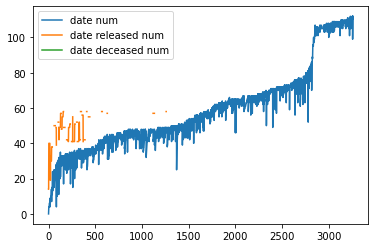

<Figure size 432x288 with 0 Axes>

In [124]:
import matplotlib.pyplot as plt
df = data[['date num', 'date released num', 'date deceased num']]
df = df.plot()
plt.figure()

In [125]:
sum(data['date deceased num'].notna())

0

In [126]:
sum(data['date released num'].notna())

304

In [127]:
data['date num'].max()

112

In [139]:
df = data.drop_duplicates(subset='patient_id')
data.shape, df.shape

((3262, 28), (640, 28))

In [140]:
def num_infected_at_time(data, time):
    num_infected = sum(data['date num'] < time)
    num_released = sum(data['date released num'] < time)
    return num_infected, num_released

In [142]:
#number of infected and number of recovered every 7 days
for i in range(0,112,7):
    print(num_infected_at_time(df, i))

(0, 0)
(4, 0)
(13, 0)
(25, 2)
(43, 3)
(85, 8)
(134, 18)
(232, 26)
(289, 42)
(375, 51)
(465, 51)
(537, 51)
(556, 51)
(561, 51)
(565, 51)
(591, 51)


In [151]:
with open('./coronavirusdataset/Time.csv', 'rb') as infile:
    time = pd.read_csv(infile)

In [154]:
time[['confirmed', 'released', 'deceased']]

,confirmed,released,deceased
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,2,0,0
...,...,...,...
111,10874,9610,256
112,10909,9632,256
113,10936,9670,258
114,10962,9695,259


In [155]:
10991/640

17.1734375

In [159]:
time[['confirmed', 'released', 'deceased']] / 17.1734375 

,confirmed,released,deceased
0,0.058229,0.000000,0.000000
1,0.058229,0.000000,0.000000
2,0.058229,0.000000,0.000000
3,0.058229,0.000000,0.000000
4,0.116459,0.000000,0.000000
...,...,...,...
111,633.187153,559.585115,14.906742
112,635.225184,560.866163,14.906742
113,636.797380,563.078883,15.023201
114,638.311346,564.534619,15.081430


In [169]:
for i in range(14,112,7):
    print('total cases', int(time.loc[i,'confirmed'] / 17.1734375),)
    print('total recovered', int(time.loc[i,'released'] / 17.1734375),)
    print('total dead', int(time.loc[i,'deceased'] / 17.1734375), '\n')

total cases 0
total recovered 0
total dead 0 

total cases 1
total recovered 0
total dead 0 

total cases 1
total recovered 0
total dead 0 

total cases 48
total recovered 1
total dead 0 

total cases 245
total recovered 1
total dead 1 

total cases 429
total recovered 9
total dead 2 

total cases 479
total recovered 66
total dead 4 

total cases 521
total recovered 184
total dead 6 

total cases 562
total recovered 304
total dead 9 

total cases 598
total recovered 384
total dead 10 

total cases 613
total recovered 433
total dead 12 

total cases 621
total recovered 472
total dead 13 

total cases 625
total recovered 510
total dead 14 

total cases 628
total recovered 536
total dead 14 



In [45]:
with open('./coronavirusdataset/TimeProvince.csv', 'rb') as infile:
    time = pd.read_csv(infile)
    
time = time[time.province=='Seoul'].reset_index()

In [46]:
time[['confirmed', 'released', 'deceased']]

,confirmed,released,deceased
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
...,...,...,...
111,663,541,2
112,683,545,2
113,695,554,2
114,707,558,3


In [47]:
711/640

1.1109375

In [48]:
for i in range(14,112,7):
    print('total cases', int(time.loc[i,'confirmed'] /1.1109375),)
    print('total recovered', int(time.loc[i,'released'] /1.1109375),)
    print('total dead', int(time.loc[i,'deceased'] /1.1109375), '\n')

total cases 4
total recovered 0
total dead 0 

total cases 12
total recovered 0
total dead 0 

total cases 12
total recovered 2
total dead 0 

total cases 31
total recovered 5
total dead 0 

total cases 81
total recovered 10
total dead 0 

total cases 117
total recovered 26
total dead 0 

total cases 227
total recovered 46
total dead 0 

total cases 297
total recovered 57
total dead 0 

total cases 383
total recovered 82
total dead 0 

total cases 506
total recovered 135
total dead 0 

total cases 549
total recovered 192
total dead 1 

total cases 561
total recovered 273
total dead 1 

total cases 566
total recovered 353
total dead 1 

total cases 573
total recovered 432
total dead 1 

